In [25]:
library(ggplot2)

In [15]:
datos=read.csv2("tes_dat.csv", header = TRUE)
notas=datos$prom_acad
DERS=datos$tot_codif
colnames(datos)

[1] "edad"      "Sexo"      "Jornada"   "prom_acad" "Trabaja"   "R_1"      
 [7] "R_2"       "R_3"       "R_4"       "R_5"       "R_6"       "R_7"      
[13] "R_8"       "R_9"       "R_10"      "R_11"      "R_12"      "R_13"     
[19] "R_14"      "R_15"      "R_16"      "R_17"      "R_18"      "R_19"     
[25] "R_20"      "R_21"      "R_22"      "R_23"      "R_24"      "R_25"     
[31] "R_26"      "R_27"      "R_28"      "R_29"      "R_30"      "R_31"     
[37] "R_32"      "R_33"      "R_34"      "R_35"      "R_36"      "tot_codif"

# Coeficiente de correlación

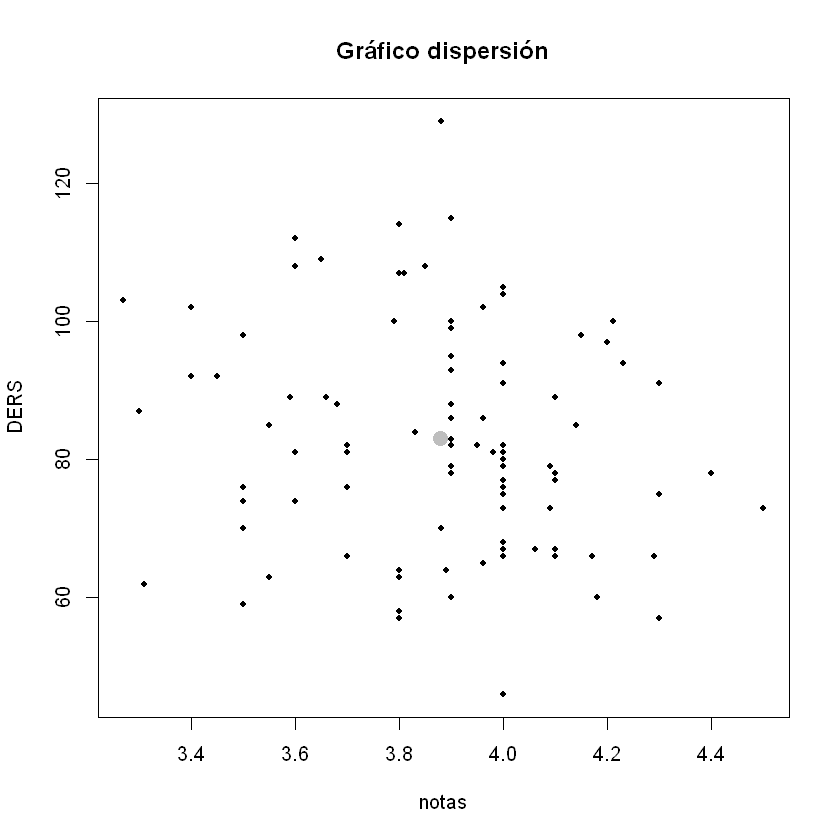

In [20]:
plot(notas,DERS, main="Gráfico dispersión", pch=16, cex=0.7)
points(mean(notas), mean(DERS), col="gray",pch=16, cex=1.7)

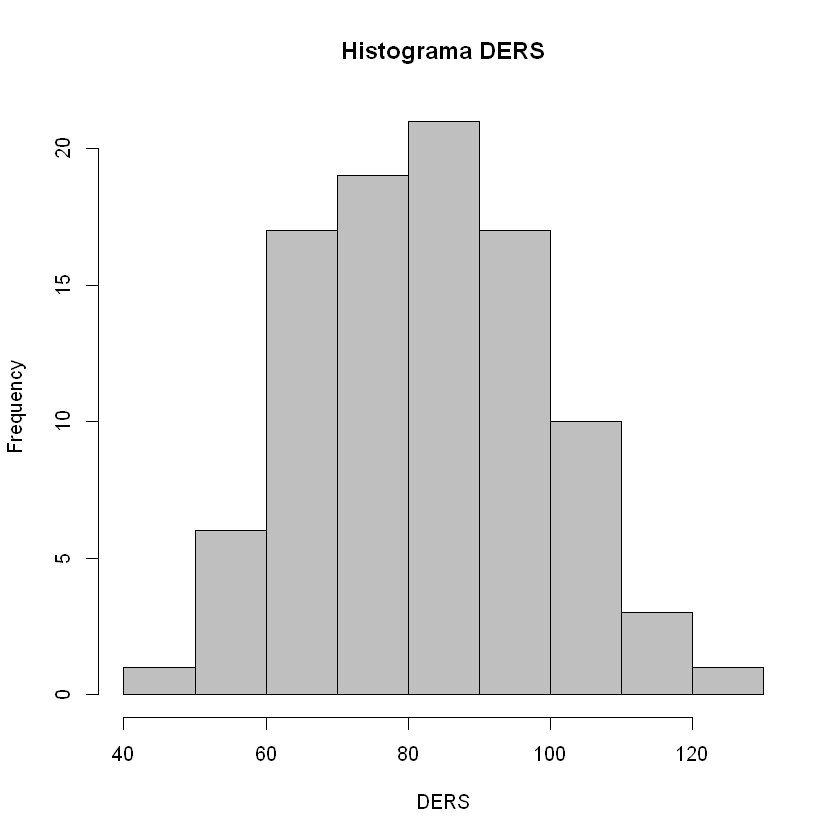

In [21]:
hist(DERS, col="gray75", main="Histograma DERS")

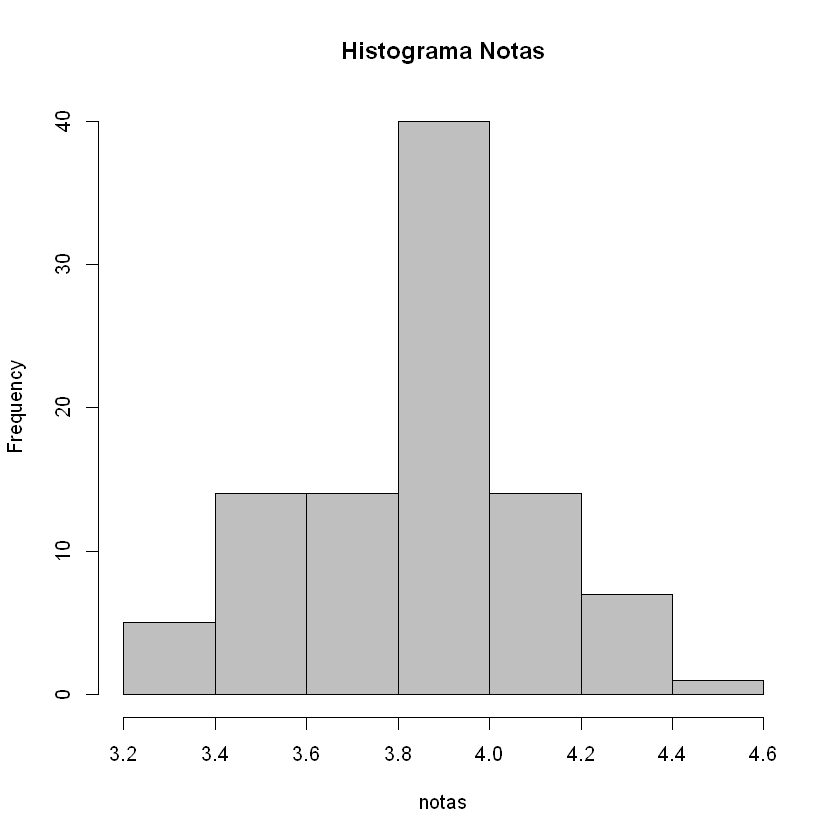

In [22]:
hist(notas, col="gray75", main="Histograma Notas")

In [18]:
cor.test(DERS,notas)


	Pearson's product-moment correlation

data:  DERS and notas
t = -1.458, df = 93, p-value = 0.1482
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.34076330  0.05367326
sample estimates:
       cor 
-0.1494868 


## Comparativo Sexo

In [24]:
table(datos$Sexo)


 F  M 
76 19 

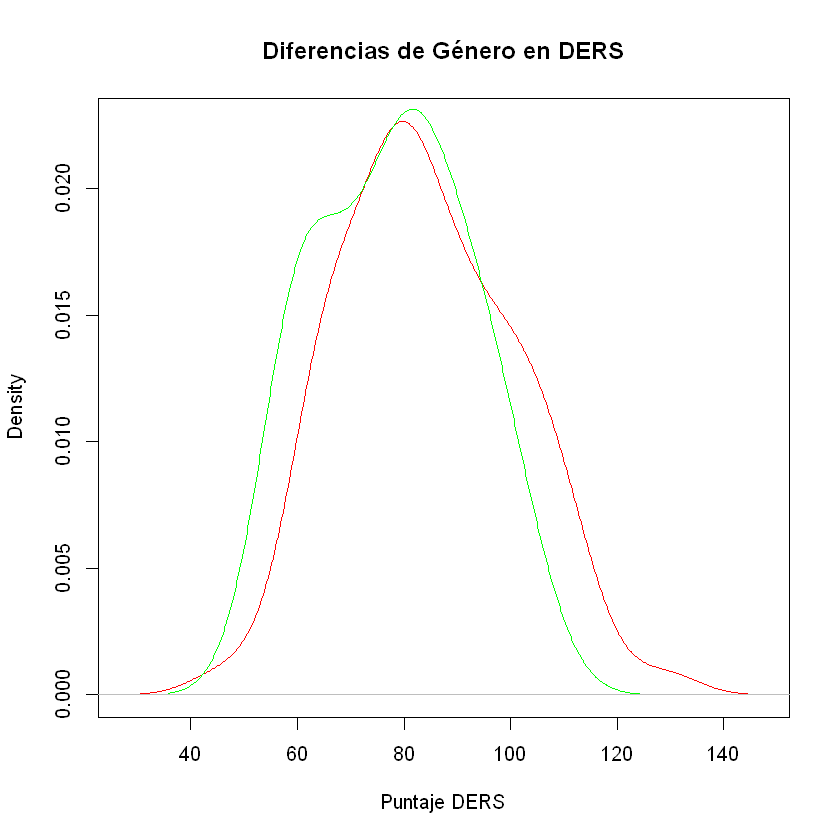

In [36]:
plot(density(DERS[datos$Sexo=="F"]),col="red", main="Diferencias de Género en DERS", xlab="Puntaje DERS")
lines(density(DERS[datos$Sexo=="M"]), col="green")

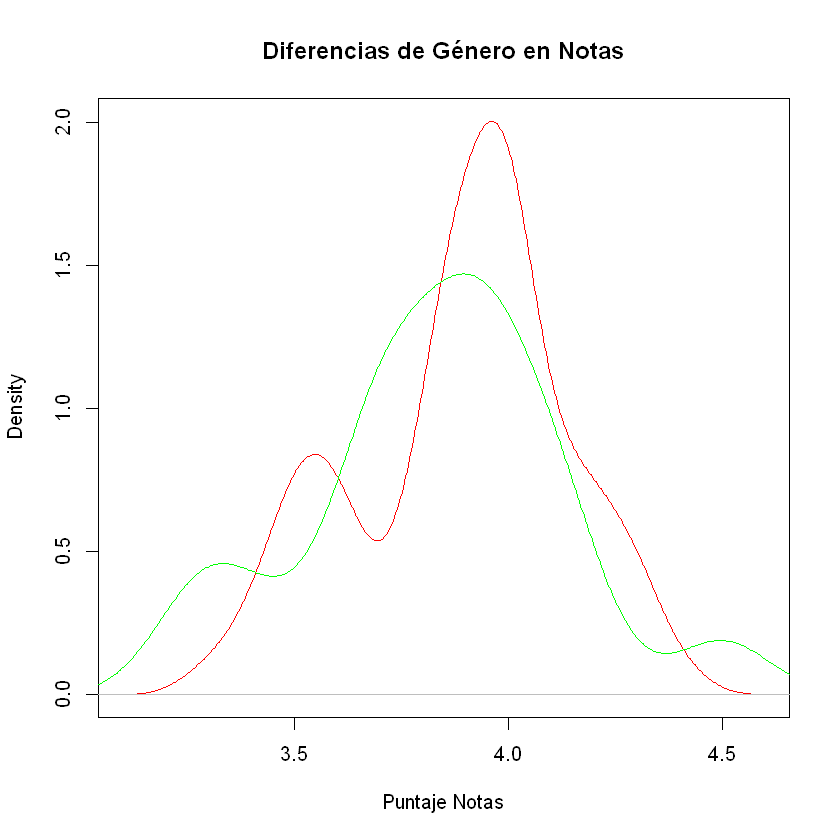

In [38]:
plot(density(notas[datos$Sexo=="F"]),col="red", main="Diferencias de Género en Notas", xlab="Puntaje Notas")
lines(density(notas[datos$Sexo=="M"]), col="green")